In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import os

In [2]:
mpl.rcParams.update(
    {'font.family': 'sans-serif',
     'font.size': 18,
     'axes.titlesize': 25,
     'axes.labelsize': 21,
     'xtick.labelsize': 21,
     'ytick.labelsize': 21,
     'legend.fontsize': 18})

## Картинка с полем

In [3]:
def getData(path):
    with open(path, 'rb') as fin:
        G = pickle.load(fin)
        if type(G) == dict:
            data= np.gradient(G['potential'], G['scale'])  # kilovolt/meter
            cellSize = G['scale']
        else:
            # G megavolt
            cellSize = 100
            data = np.gradient(1000 * G, cellSize)  # kilovolt/meter
    return data

In [4]:
np.max(Ex)

NameError: name 'Ex' is not defined

In [18]:
def plotStream(data, indx, cmap='hot', density=4, arrowsize=4):
    x = np.arange(65)
    y = np.arange(75)
    
    Ex, Ey, Ez = data
    E = (Ex**2 + Ey**2 + Ez**2)**0.5
    x_size = 841/25.2
    y_size = 2**0.5 * x_size
    plt.figure(figsize= (x_size,y_size))
    u = Ex[:,indx,:]
    v = Ez[:,indx,:]
    color = E[:, indx, :]
    plt.streamplot(x, y, u.T, v.T, color=color.T, cmap=cmap, density= density, arrowsize=arrowsize)
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('electric_streams.ps', format='ps', papertype='a0');

In [6]:
def plotStreamPresentation(data, indx, cmap='hot', density=4, arrowsize=4):
    x = np.arange(65)
    y = np.arange(75)
    plt.gcf().subplots_adjust(bottom=0.15)
    Ex, Ey, Ez = data
    E = (Ex**2 + Ey**2 + Ez**2)**0.5
    y_size = 220/25.2
    x_size = 297/25.2
    plt.figure(figsize= (x_size,y_size))
    u = Ex[30:60,indx,30:60]
    v = Ez[30:60,indx,30:60]
    color = E[30:60, indx, 30:60]
    plt.streamplot(x[30:60], y[30:60], u.T, v.T, color=color.T, cmap=cmap, density= density, arrowsize=arrowsize)
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('electric_streams.pdf', orientation='landscape', papertype="a4");

In [4]:
path = "../data/thunderstorm/poster_tepa_2018/potential_for_poster.obj"
data2 = getData(path)

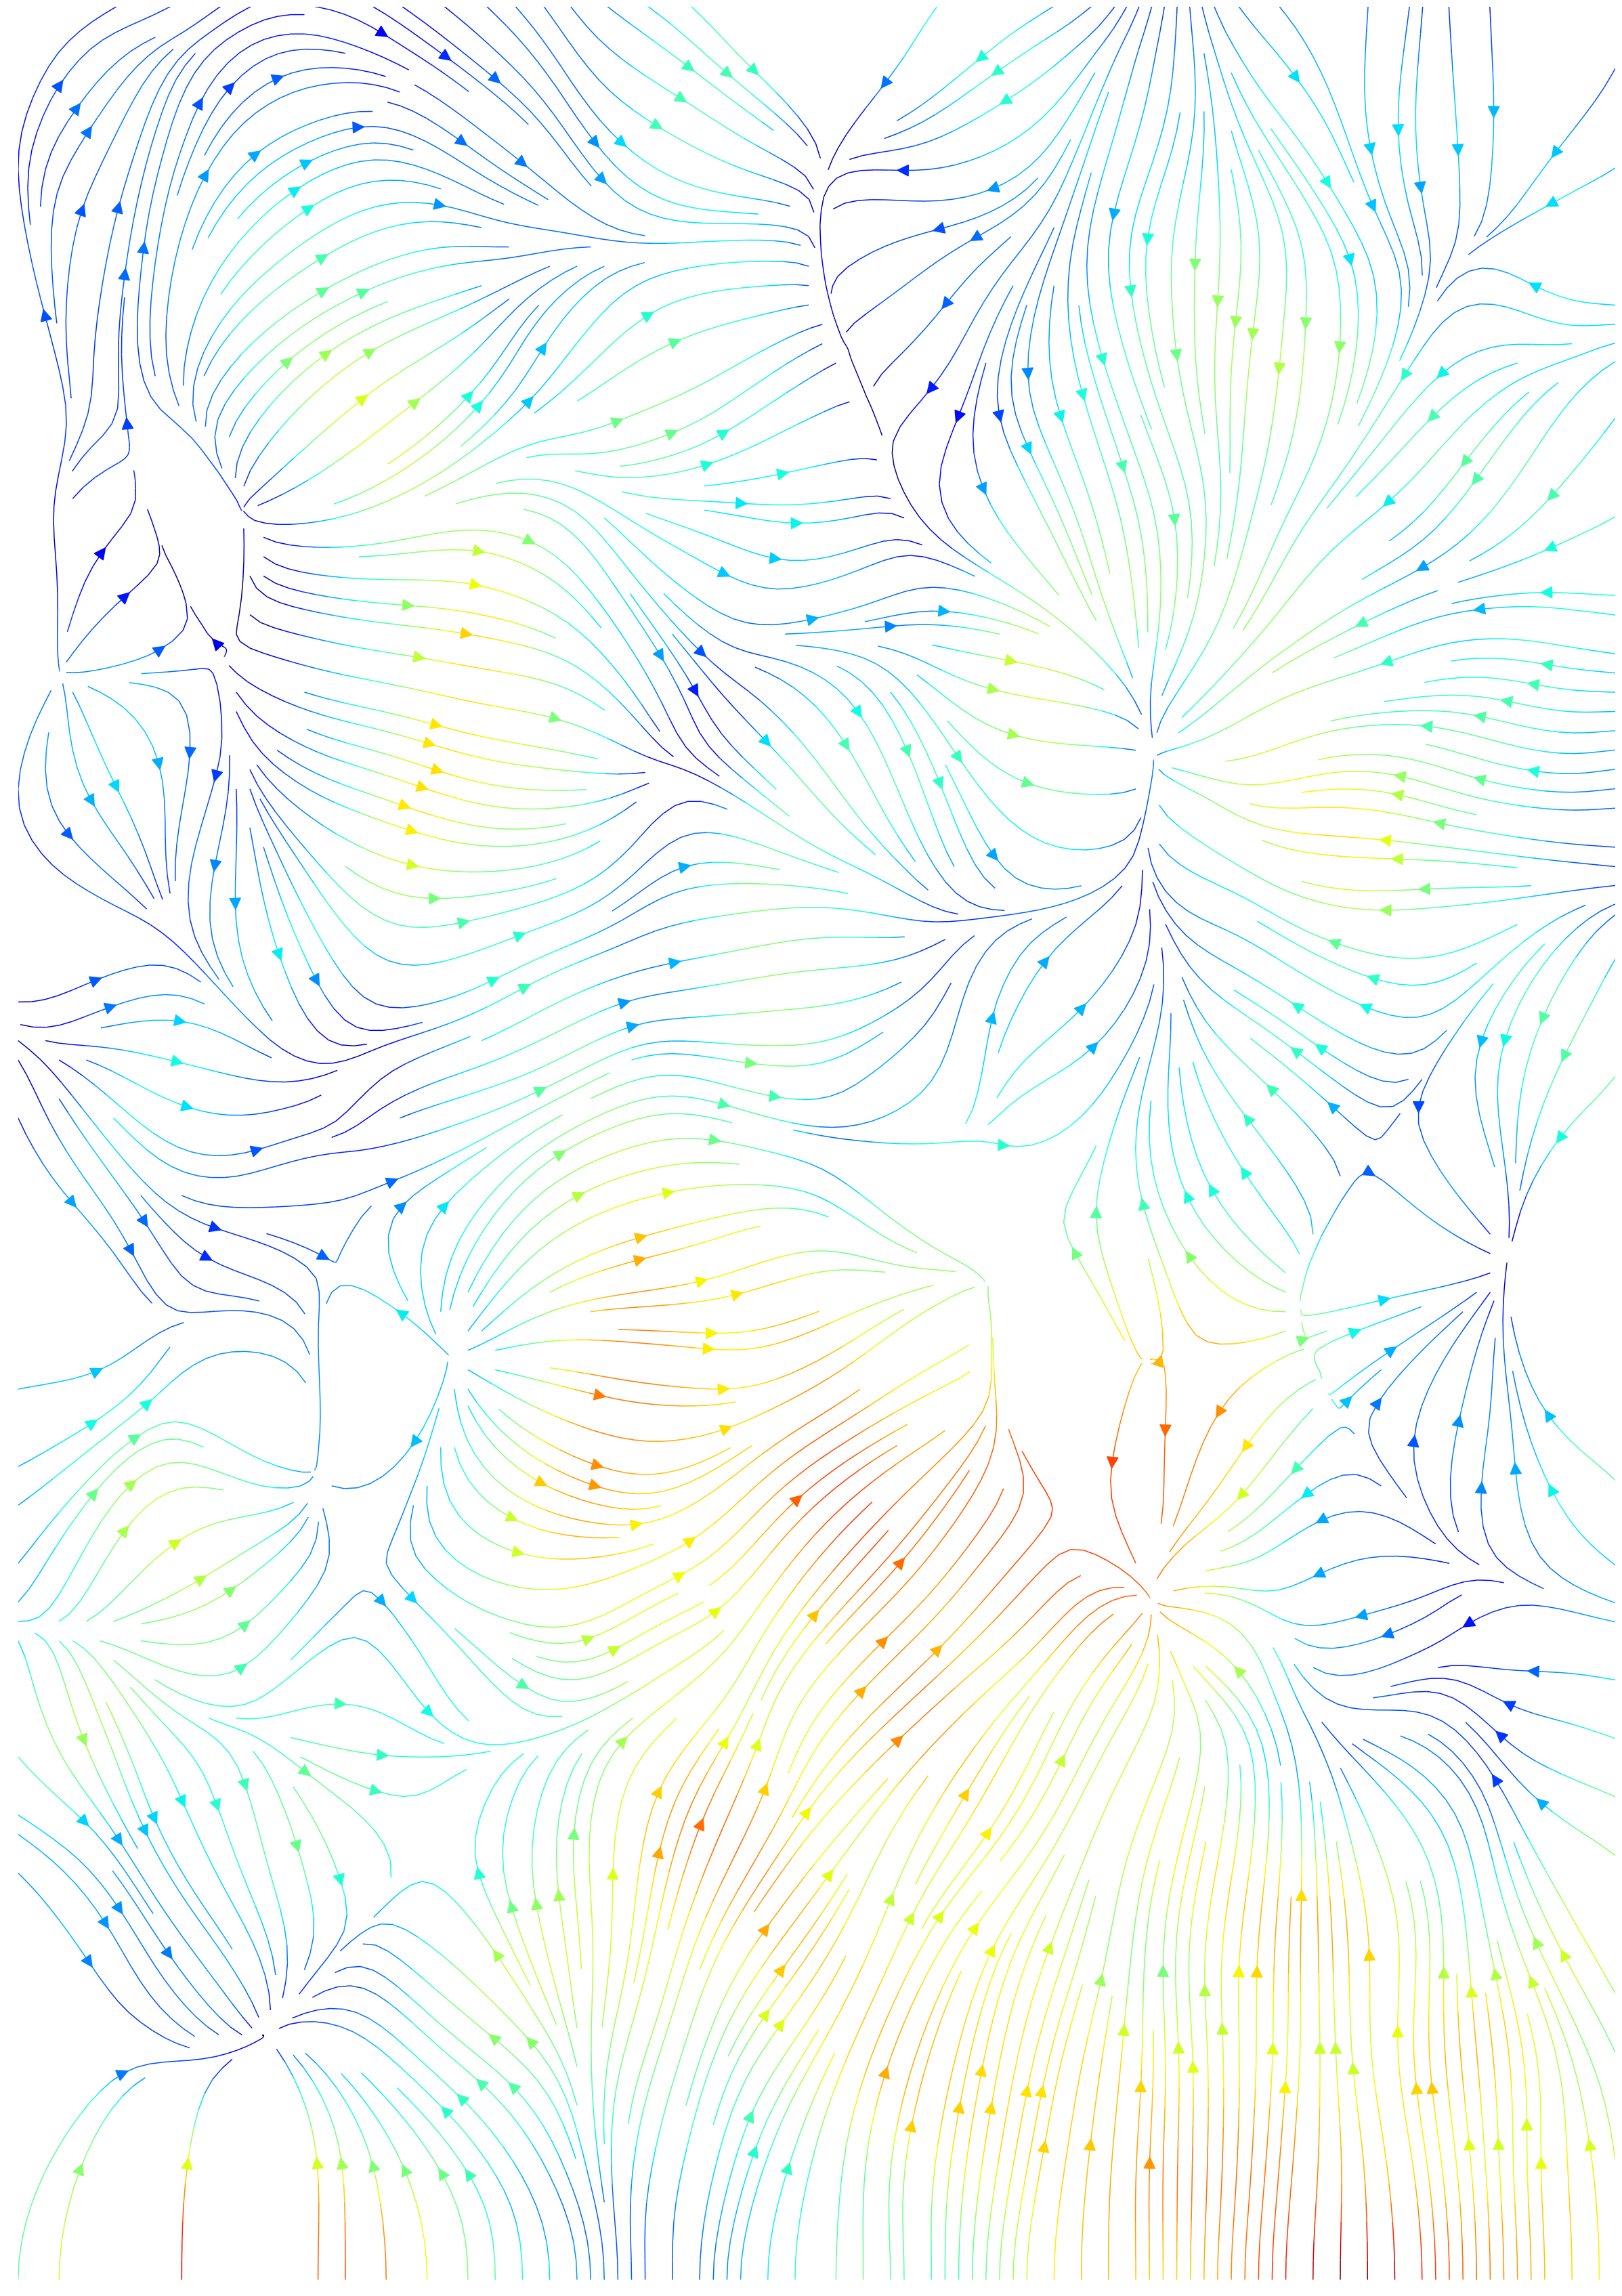

In [20]:
plot_stream = plotStream(data2, 30,cmap = 'jet' )

<Figure size 432x288 with 0 Axes>

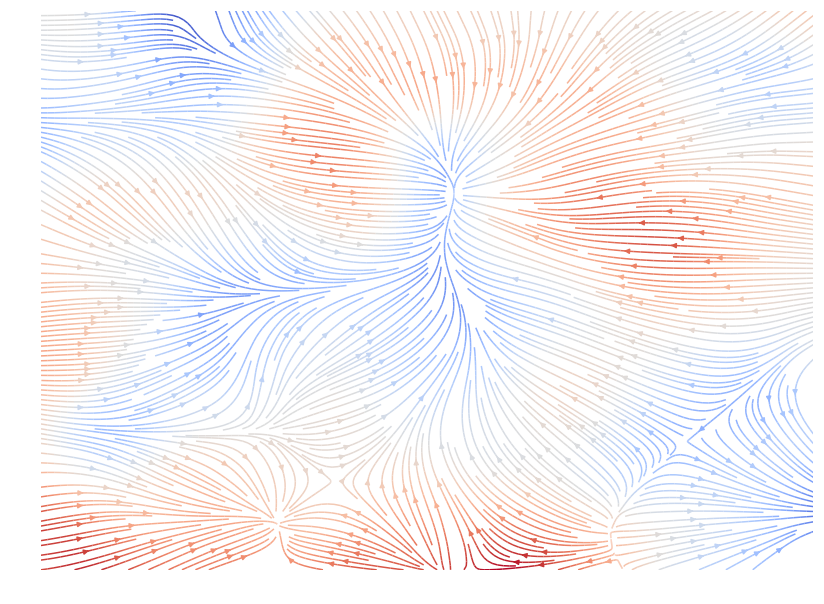

In [8]:
plot_stream = plotStreamPresentation(data2, 30,cmap = 'coolwarm', arrowsize=1 )

In [57]:
Ex, Ey, Ez = data2
E = (Ex**2 + Ey**2 + Ez**2)**0.5
E.max()

208.51026529011659

## Экспорт поля для Kotlin

In [61]:
for field, name in zip(data2, ['Ex.txt', 'Ey.txt', 'Ez.txt']):
    with open(name, 'w') as fout:
        for x in field:
            for y in x:
                fout.write(';'.join(map(str, y)) + '\n')

In [63]:
65*65

4225

## Proof of  concept

In [66]:
path_image = '/home/zelenyy/npm/git/scientific-papers/TEPA_2018/figures/'

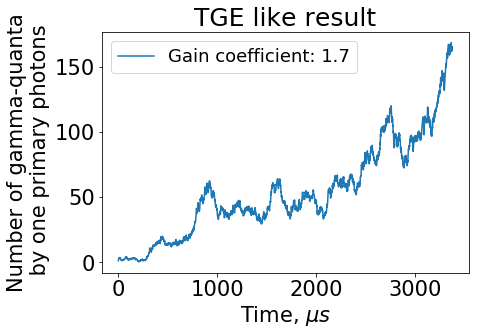

In [69]:
path = '../data/thunderstorm/poster_tepa_2018/TGE_like_gain_1.7.txt'
data = np.loadtxt(path, skiprows=1, delimiter=';')
plt.figure(figsize=(7,5))
plt.plot(data[:,0], data[:,1]/100, label = "Gain coefficient: {}".format(1.7))
plt.title("TGE like result")
plt.xlabel(r'Time, $\mu s$')
plt.ylabel('Number of gamma-quanta\n by one primary photons')
plt.legend();
plt.tight_layout()
plt.savefig(os.path.join(path_image, 'proofTGE.pdf'), format='pdf', transparent=True);

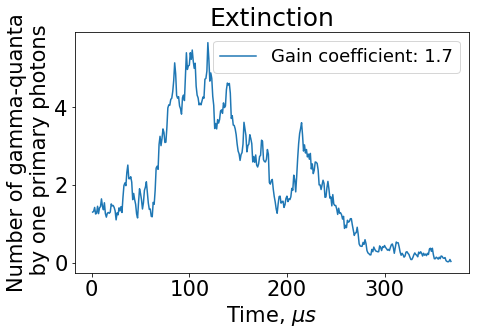

In [70]:
path = '../data/thunderstorm/poster_tepa_2018/Extinction_gain_1.7.txt'
data = np.loadtxt(path, skiprows=1, delimiter=';')
plt.figure(figsize=(7,5))
plt.plot(data[:,0], data[:,1]/100, label="Gain coefficient: {}".format(1.7))
plt.title("Extinction")
plt.xlabel(r'Time, $\mu s$')
plt.ylabel('Number of gamma-quanta\n by one primary photons')
plt.legend();
plt.tight_layout()
plt.savefig(os.path.join(path_image, 'Extinction.pdf'), format='pdf', transparent=True);

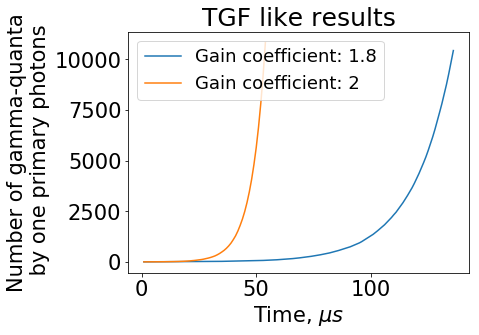

In [71]:
plt.figure(figsize=(7,5))

path = '../data/thunderstorm/poster_tepa_2018/TGF_like_gain_1.8.txt'
data = np.loadtxt(path, skiprows=1, delimiter=';')
plt.plot(data[:,0], data[:,1]/100, label="Gain coefficient: {}".format(1.8))

path = '../data/thunderstorm/poster_tepa_2018/TGF_like_gain_2.0.txt'
data = np.loadtxt(path, skiprows=1, delimiter=';')
plt.plot(data[:,0], data[:,1]/100, label="Gain coefficient: {}".format(2))

plt.title("TGF like results")
plt.xlabel(r'Time, $\mu s$')
plt.ylabel('Number of gamma-quanta\n by one primary photons')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(path_image, 'proofTGF.pdf'), format='pdf', transparent=True);

## Results

In [28]:
dates = np.arange(5)
date_labels = [1925, 1990, 1994, 2001, 2008, 2009]
texts=[
    """
    1925\nPredicted\n gamma-ray from\n thunderstorm cloud
    """,
    """
    1990\nCreated theory of\n runway breakdown
    """,
    """
    1994\nTGF observed on\n Compton Gamma\n Ray Observatory
    """,
    """
    2001\nStart observation in\n New Mexico Institute of\n Mining and Technology.
    """,
    """
    2008\nStart observation\n on Aragats
    """,
    """
    2009\nTGF observed on FERMI
    """
]


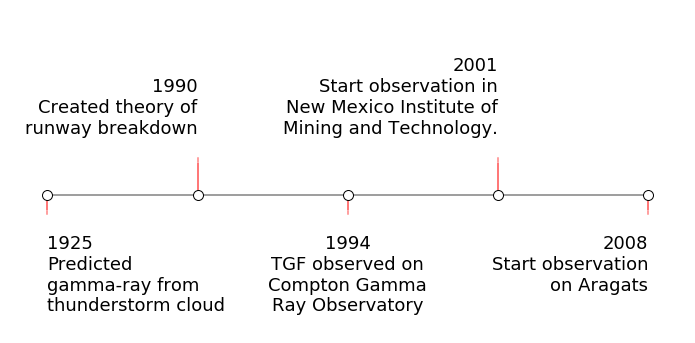

In [53]:
dates = np.arange(5)
levels = np.array([-1, 2, -1, 2, -1, 2])/3

fig, ax = plt.subplots(figsize=(10,5))
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)
for ii, (iname, idate) in enumerate(zip(texts, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'
    ax.scatter(0, 3, facecolor='w', edgecolor='w')
    ax.scatter(0, -2, facecolor='w', edgecolor='w')
    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    if (ii==0):
        aligm = 'left'
    elif (ii==2):
        aligm= 'center'
    else:
        aligm = 'right'
    
    ax.text(idate, level, iname,
            horizontalalignment=aligm, 
            verticalalignment=vert, 
            fontsize=18,
            backgroundcolor=(1., 1., 1., .3),
           wrap=True)
    
plt.setp((ax.get_yticklabels() + ax.get_yticklines() 
          + ax.get_xticklines()+ax.get_xticklabels()+
          list(ax.spines.values())), visible=False);
plt.tight_layout()
plt.savefig("timeline.pdf", format="pdf", transparent=True)

# Figures for PhD thesis

In [9]:
mpl.rcParams.update(
    {'font.family': 'sans-serif',
     'font.size': 18,
     'axes.labelsize': 18,
     'xtick.labelsize': 18,
     'ytick.labelsize': 18,
     'legend.fontsize': 18})

In [3]:
path_image = '/home/zelenyy/npm/another/scientific-papers/Russian-Phd-LaTeX-Dissertation/Dissertation/images/thunderstorm/'

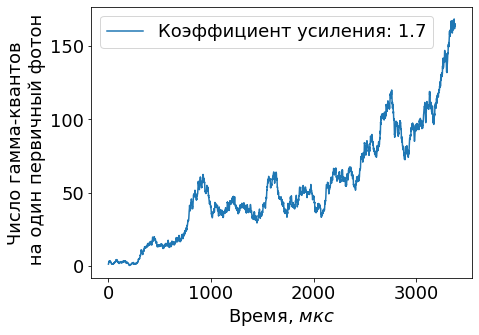

In [10]:
path = '../data/thunderstorm/poster_tepa_2018/TGE_like_gain_1.7.txt'
data = np.loadtxt(path, skiprows=1, delimiter=';')
plt.figure(figsize=(7,5))
plt.plot(data[:,0], data[:,1]/100, label = "Коэффициент усиления: {}".format(1.7))
# plt.title("TGE-подобное нарастание")
plt.xlabel(r'Время, $мкс$')
plt.ylabel('Число гамма-квантов\n на один первичный фотон')
plt.legend();
plt.tight_layout()
plt.savefig(os.path.join(path_image, 'RL_proofTGE.pdf'), format='pdf', transparent=True);

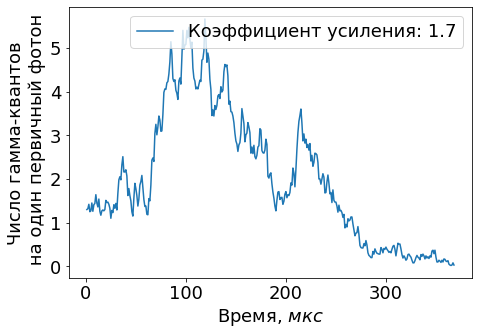

In [11]:
path = '../data/thunderstorm/poster_tepa_2018/Extinction_gain_1.7.txt'
data = np.loadtxt(path, skiprows=1, delimiter=';')
plt.figure(figsize=(7,5))
plt.plot(data[:,0], data[:,1]/100, label="Коэффициент усиления: {}".format(1.7))
# plt.title("Затухание лавины")
plt.xlabel(r'Время, $мкс$')
plt.ylabel('Число гамма-квантов\n на один первичный фотон')
plt.legend();
plt.tight_layout()
plt.savefig(os.path.join(path_image, 'RL_Extinction.pdf'), format='pdf', transparent=True);

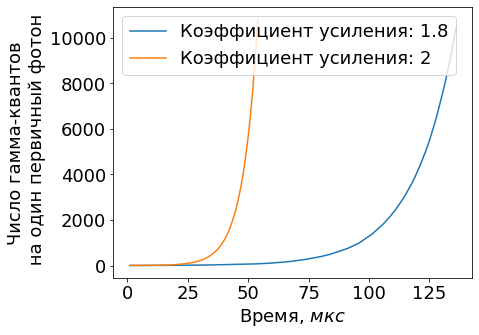

In [12]:
plt.figure(figsize=(7,5))

path = '../data/thunderstorm/poster_tepa_2018/TGF_like_gain_1.8.txt'
data = np.loadtxt(path, skiprows=1, delimiter=';')
plt.plot(data[:,0], data[:,1]/100, label="Коэффициент усиления: {}".format(1.8))

path = '../data/thunderstorm/poster_tepa_2018/TGF_like_gain_2.0.txt'
data = np.loadtxt(path, skiprows=1, delimiter=';')
plt.plot(data[:,0], data[:,1]/100, label="Коэффициент усиления: {}".format(2))

# plt.title("TGF-подобное нарастание")
plt.xlabel(r'Время, $мкс$')
plt.ylabel('Число гамма-квантов\n на один первичный фотон')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(path_image, 'RL_proofTGF.pdf'), format='pdf', transparent=True);